# Laboratorio di simulazione numerica

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import string
from scipy.optimize import curve_fit

### Exercise 02.1

In this exercise I calculated an integral with Monte Carlo techniques.

The first result is obtained with the basic procedure of drawing a set $\{x_i\}_{i\in I}$ of uniformly distributed numbers in the domain of the function $f$ to be integrated, and then taking the average of $\{f(x_i)\}_{i\in I}$.
As usual, I repeated the simulation a certain number of times (i.e. dividing the set in smaller subsets, and treating each one as a separate simulation), and at each new step I calculated the overall average and standard deviation.
The red dotted line indicates the analytical value of the integral.

In [2]:
prefix = "exercise02-1/"

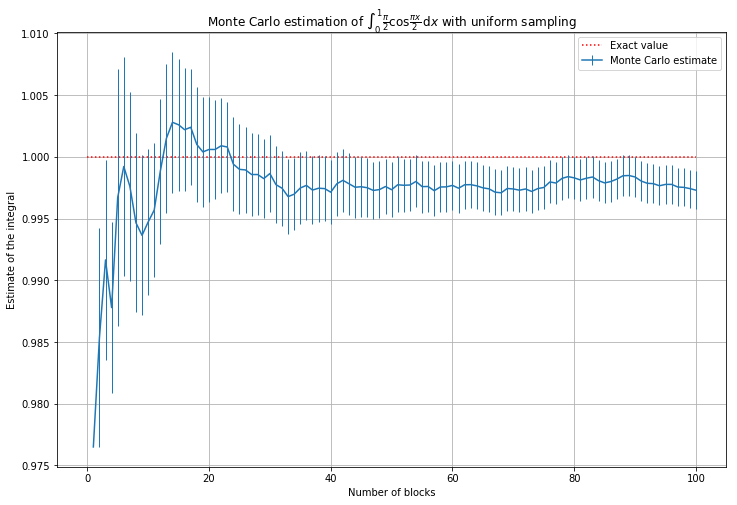

In [3]:
filename = prefix + "integral_standard_sampling.dat"
integral_avg, integral_std = np.loadtxt(filename, skiprows = 1, unpack = True)
plt.figure(figsize = (12, 8))
plt.hlines(
    1,
    0,
    len(integral_avg),
    colors = "red",
    linestyle = "dotted",
    label = "Exact value"
)
plt.errorbar(
    range(1, len(integral_avg) + 1),
    integral_avg,
    yerr = integral_std,
    elinewidth = 1,
    label = "Monte Carlo estimate"
)
plt.title(r"Monte Carlo estimation of $\int_0^1\frac{\pi}{2}\cos\frac{\pi x}{2}\,\mathrm{d}x$ with uniform sampling")
plt.xlabel("Number of blocks")
plt.ylabel("Estimate of the integral")
plt.legend()
plt.grid(True)
plt.show()

For the *importance sampling* technique, the numbers in $\{x_i\}_{i\in I}$ were sampled on the domain of the function, $[0,1]$, from the distribution with density function $\phi(x)=2(1-x)$.
The integral is estimated then by the average of $\bigl\{\frac{f(x_i)}{\phi(x_i)}\bigr\}_{i\in I}$, and the rest is as above.

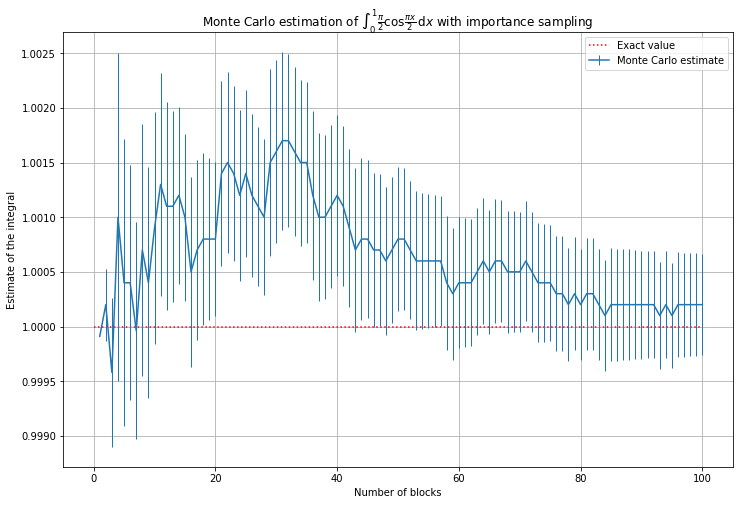

In [4]:
filename = prefix + "integral_importance_sampling.dat"
integral_avg, integral_std = np.loadtxt(filename, skiprows = 1, unpack = True)
plt.figure(figsize = (12, 8))
plt.hlines(
    1,
    0,
    len(integral_avg),
    colors = "red",
    linestyle = "dotted",
    label = "Exact value"
)
plt.errorbar(
    range(1, len(integral_avg) + 1),
    integral_avg,
    yerr = integral_std,
    elinewidth = 1,
    label = "Monte Carlo estimate"
)
plt.title(r"Monte Carlo estimation of $\int_0^1\frac{\pi}{2}\cos\frac{\pi x}{2}\,\mathrm{d}x$ with importance sampling")
plt.xlabel("Number of blocks")
plt.ylabel("Estimate of the integral")
plt.legend()
plt.grid(True)
plt.show()

It is evident that the importance sampling technique gave better results: the expected value lies within a standard deviation from the overall average.

### Exercise 02.2

In this exercise I simulated two random walks.

The first one is a walk on a cubic lattice, $\mathbf{Z}^3$, where at every point the probability of stepping to each of the six nearest neighbouring points was equal.

In [5]:
prefix = "exercise02-2/"

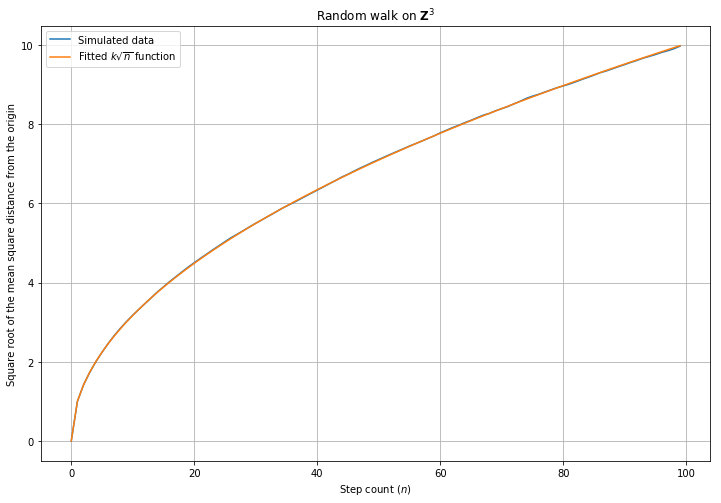

The fitted function has a parameter k = 1.00e+00 +- 1.60e-04.


In [6]:
# Data collection
filename = prefix + "cubic_random_walk.dat"
msd = np.loadtxt(filename)

# Plot
plt.figure(figsize = (12, 8))
plt.plot(msd, label = "Simulated data")
plt.title(r"Random walk on $\mathbf{Z}^3$")
plt.xlabel(r"Step count ($n$)")
plt.ylabel("Square root of the mean square distance from the origin")

# Fit a function k * sqrt(n) to the data
def f(x, k):
    return k * np.sqrt(x)
x_range = range(len(msd))
optimal_values, covariance_matrix = curve_fit(f, x_range, msd)
k_fit = optimal_values[0]
plt.plot(
    x_range,
    [k_fit * np.sqrt(x) for x in x_range],
    label = r"Fitted $k\sqrt{n}$ function"
)
plt.legend()
plt.grid(True)

plt.show()

print("The fitted function has a parameter k = "
      + "{:.2e}".format(optimal_values[0]) + " +- " + "{:.2e}".format(np.sqrt(covariance_matrix[0][0]))
      + ".")

The second walk is on $\mathbf{R}^3$: at each step, there is equal probability to move in any direction (represented by a point on the unit sphere).

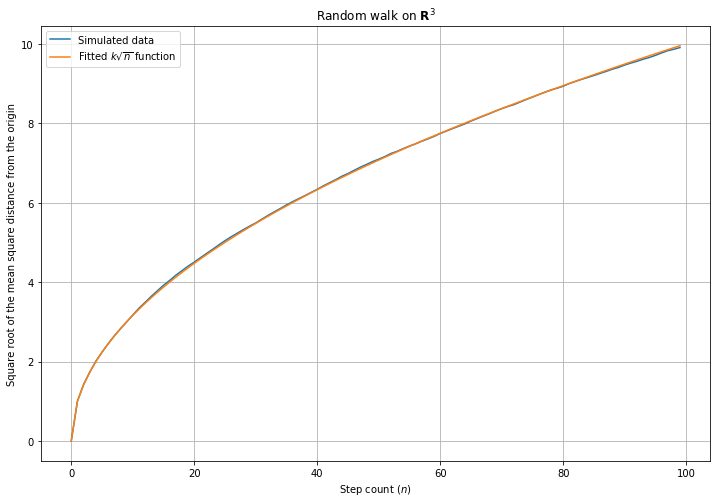

The fitted function has a parameter k = 1.00e+00 +- 3.35e-04.


In [7]:
# Data collection
filename = prefix + "continuous_random_walk.dat"
msd = np.loadtxt(filename)

# Plot
plt.figure(figsize = (12, 8))
plt.plot(msd, label = "Simulated data")
plt.title(r"Random walk on $\mathbf{R}^3$")
plt.xlabel(r"Step count ($n$)")
plt.ylabel("Square root of the mean square distance from the origin")

# Fit a function k * sqrt(n) to the data
def f(x, k):
    return k * np.sqrt(x)
x_range = range(len(msd))
optimal_values, covariance_matrix = curve_fit(f, x_range, msd)
k_fit = optimal_values[0]
plt.plot(
    x_range,
    [k_fit * np.sqrt(x) for x in x_range],
    label = r"Fitted $k\sqrt{n}$ function"
)
plt.legend()
plt.grid(True)

plt.show()

print("The fitted function has a parameter k = "
      + "{:.2e}".format(optimal_values[0]) + " +- " + "{:.2e}".format(np.sqrt(covariance_matrix[0][0]))
      + ".")

In both plots the uncertainties are so small that they cannot be seen.

The function $\sqrt{n}$ fits really well to the data (so much that in the plots above the original data is almost obscured), and this suggests the random walk have a diffusive behaviour.